# 1.Taking out the PII

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#creating a path
path = r'/Users/ajahanderson/Documents/Instacart Basket Analysis 11-13-2023'

In [3]:
#creating a file path
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_left.pkl')

In [4]:
#excluding columns with PII
columns_to_exclude = ['first_name', 'last_name','Regions_loc']

In [5]:
#reading the pickle
df_merged = pd.read_pickle(file_path)

In [6]:
#putting it all together
df_merged = df_merged.drop(columns=columns_to_exclude, errors='ignore')

# 2. Create a regional segmentation of the data. 

In [7]:
#creating regions
df_merged.loc[df_merged['State'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'Regions'] = 'Northeast'
df_merged.loc[df_merged['State'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'Regions'] = 'MidWest'
df_merged.loc[df_merged['State'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'Regions'] = 'South'
df_merged.loc[df_merged['State'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'Regions'] = 'West'


/var/folders/5t/s295bnhn7bvf1407s3py_b8h0000gn/T/ipykernel_5458/3788717933.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Northeast' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_merged.loc[df_merged['State'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'Regions'] = 'Northeast'


In [8]:
#creating a crosstab
crosstab = pd.crosstab(df_merged['loyalty_flag'], df_merged['Regions'],dropna = False)

In [9]:
crosstab.to_clipboard()

# 3. Create an exclusion flag for low-activity customers

In [10]:
#creating a column for low-activity
df_merged.loc[df_merged['max_order']<= 5, 'activity'] = 'low activity'

/var/folders/5t/s295bnhn7bvf1407s3py_b8h0000gn/T/ipykernel_5458/3493739549.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'low activity' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_merged.loc[df_merged['max_order']<= 5, 'activity'] = 'low activity'


In [11]:
#counting all the low activity
low_activity_count = (df_merged['activity'] == 'low activity').sum()

In [12]:
#excluding rows
df = df_merged[df_merged['activity'] != 'low activity']

In [13]:
#exporting data
df.to pickle(os.path.join(path, '02 Data', 'Prepared Data', '3.10_data.pkl'))

SyntaxError: invalid syntax (2214340220.py, line 2)

# 4. Create a profiling variable

In [14]:
#creating the conditions to make a customer profile
condition_pet_owners = (
    (df['department_id'].isin([8])) &
    (df['age']<= 81) &
    (df['income'] <= 593901) &
    (df['n_dependents'] <= 3))

condition_young_parent = (
    (df['department_id'].isin([18])) &
    (df['age'].isin([18, 19, 20, 21, 22, 23, 24, 25])) &
    (df['income'] <= 394023) &
    (df['n_dependents'] == 1))


In [15]:
#creating a customer profile
df.loc[condition_pet_owners, 'customer_profile'] = 'Pet Owner'
df.loc[condition_young_parent, 'customer_profile'] = 'Young Parent'

/var/folders/5t/s295bnhn7bvf1407s3py_b8h0000gn/T/ipykernel_5458/4103088803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[condition_pet_owners, 'customer_profile'] = 'Pet Owner'
/var/folders/5t/s295bnhn7bvf1407s3py_b8h0000gn/T/ipykernel_5458/4103088803.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Pet Owner' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[condition_pet_owners, 'customer_profile'] = 'Pet Owner'


# 5. Creating visualization to show the distribution of profile

/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


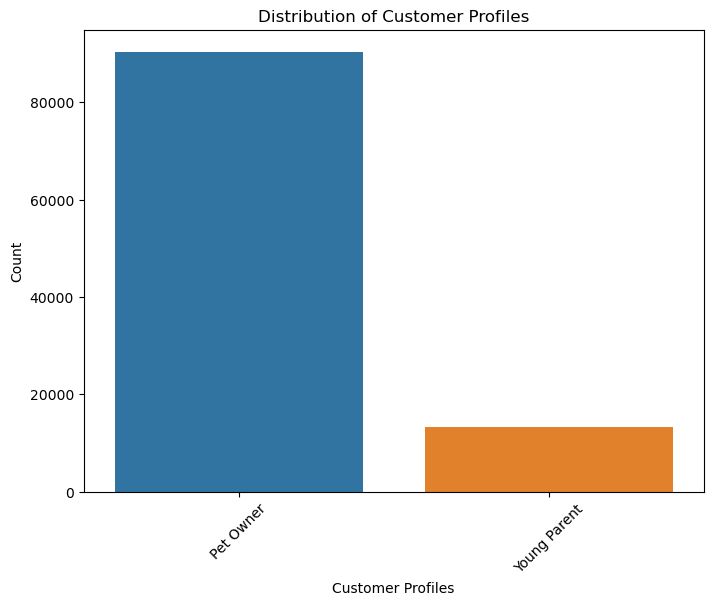

In [16]:
#charing a bar chart to show the frequency
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='customer_profile')
plt.title('Distribution of Customer Profiles')
plt.xlabel('Customer Profiles')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

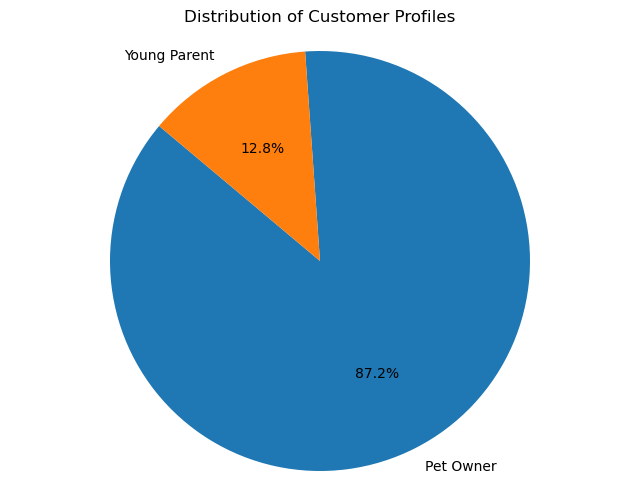

In [17]:
profile_counts = df['customer_profile'].value_counts()

# Create a pie chart to represent the distribution of customer profiles
plt.figure(figsize=(8, 6))
plt.pie(profile_counts, labels=profile_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customer Profiles')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [18]:
#marking columns over 100 nan
df.loc[df['mean_spent'] >100, 'mean_spent'] = np.nan

In [19]:
#aggregate function for the expediture
stats_by_expenditure = df.groupby('customer_profile')['mean_spent'].agg(['mean', 'min', 'max'])

# 6. Aggregate the max, mean, and min variables on a customer-profile level 

In [20]:
#aggretgate functions for the frequency
stats_by_frequency = df.groupby('customer_profile')['order_frequency'].agg(['mean', 'min', 'max'])

In [21]:
stats_by_frequency

,mean,min,max
customer_profile,,,
Pet Owner,25.286284,3.0,30.0
Young Parent,23.726481,4.0,30.0


# 7. Compare your customer profiles with regions and departments. 

In [22]:
department_earnings_pivot = df.pivot_table(index='department_id', values='mean_spent', aggfunc='sum')

In [23]:
department_earnings_pivot

,mean_spent
department_id,
1,39733173.2
2,619462.8
3,21217699.8
4,172543177.6
5,2280934.0
6,4862024.2
7,46185343.5
8,1693866.5
9,15782458.2


In [24]:


# Create a pivot table to display spending per department for each customer profile
profile_department_spending = df.pivot_table(index='customer_profile', columns='department_id', values='mean_spent', aggfunc='sum')


profile_department_spending


department_id,8,18
customer_profile,,
Pet Owner,1693866.5,NaN
Young Parent,NaN,259042.9


In [25]:
#creating a pivot table to see pet owners throughout the regions
chosen_profile = 'Pet Owner'

In [26]:
profile_data = df[df['customer_profile'] == chosen_profile]


In [27]:
profile_region_spending = profile_data.pivot_table(index='Regions', columns='department_id', values='mean_spent', aggfunc='sum')


In [28]:
profile_region_spending.fillna(0, inplace=True)


In [29]:
profile_region_spending

department_id,8
Regions,
MidWest,386106.6
Northeast,323782.8
South,540510.2
West,443466.9


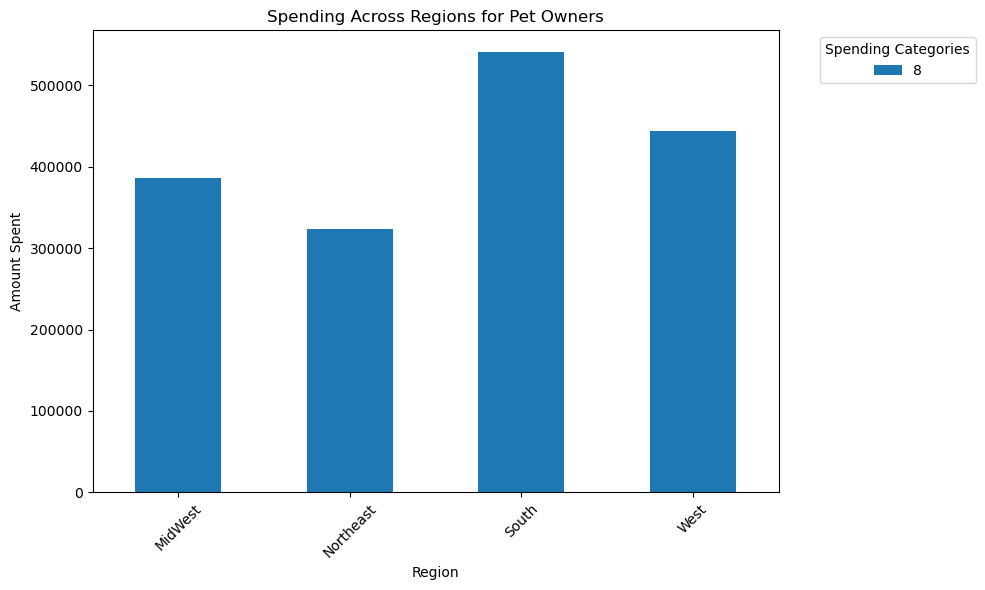

In [30]:
#this is apart of number
pet_owners = profile_region_spending.plot(kind='bar', figsize=(10, 6))
plt.title('Spending Across Regions for Pet Owners')
plt.xlabel('Region')
plt.ylabel('Amount Spent')
plt.legend(title='Spending Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
#creating a pivot table to see Young Parents throughout the regions 
chosen_profile_2 = 'Young Parent'

In [32]:
profile_data = df[df['customer_profile'] == chosen_profile_2]

In [33]:
profile_region_spending_2 = profile_data.pivot_table(index='Regions', columns='department_id', values='mean_spent', aggfunc='sum')


In [34]:
profile_region_spending_2.fillna(0, inplace=True)


In [35]:
profile_region_spending_2

department_id,18
Regions,
MidWest,65775.2
Northeast,44257.6
South,83360.4
West,65649.7


# 8. create a chart

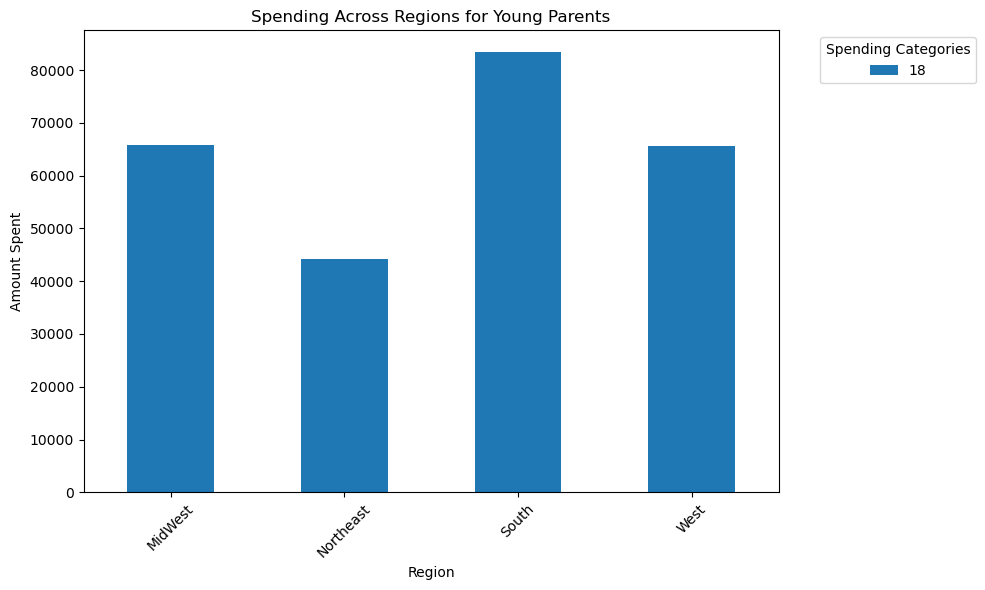

In [36]:
young_parents = profile_region_spending_2.plot(kind='bar', figsize=(10, 6))
plt.title('Spending Across Regions for Young Parents')
plt.xlabel('Region')
plt.ylabel('Amount Spent')
plt.legend(title='Spending Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# creating histogram object
income_histogram = df_opd['income'].plot.hist(title='Distribution of Consumer Incomes', xlabel='Income', ylabel='Frequency', color='green', edgecolor='white',bins =70)
plt.savefig('income_histogram.png')
plt.show()

In [ ]:
# creating bar object for department frequency count
department_bar_count =df_opd['department'].value_counts().plot.bar(title='Total Purchases by Department', xlabel='Department', ylabel='Frequency', color='green', edgecolor='black')
plt.savefig('department_bar_count.png')
plt.show()

In [ ]:
#creating barchart for top 10 most popular products
popular_products_barchart = df_popular_products['product_name'].value_counts()[:10].plot.bar(title='Top 10 most Popular Products in Produce', xlabel='Product Names', ylabel='Orders', color='green', edgecolor='black')
plt.savefig('popular_products_barchart.png')
plt.show()

In [37]:
pet_owners.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pet_owners.png'))


In [38]:
young_parents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'young_parents.png'))
